# Task 1: Text Classification

1.  Download the BBC dataset provided on Moodle. The dataset, created by [Greene and Cunningham, 2006],
is a collection of 2225 documents from the BBC news website already categorized into 5 classes: business,
entertainment, politics, sport, and tech.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import sklearn

2. Plot the distribution of the instances in each class and save the graphic in a ﬁle called BBC-distribution.pdf.
You may want to use matplotlib.pyplot and savefig to do this. This pre-analysis of the data set will
allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate
the performance of your classiﬁer.

In [2]:
files = load_files('BBC', encoding='latin1')
files_data = np.array(files.data)

In [31]:
targets = files.target_names
business = files_data[files.target == targets.index('business')]
entertainment = files_data[files.target == targets.index('entertainment')]
politics = files_data[files.target == targets.index('politics')]
sport = files_data[files.target == targets.index('sport')]
tech = files_data[files.target == targets.index('tech')]

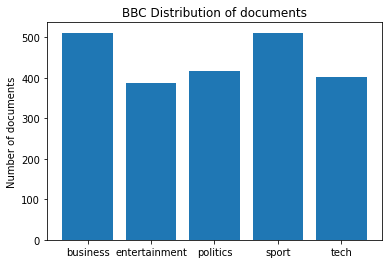

In [46]:
plt.bar(targets, [len(business), len(entertainment), len(politics), len(sport), len(tech)] )
plt.ylabel("Number of documents")
plt.title("BBC Distribution of documents")
plt.savefig('BBC-distribution.pdf')
plt.show()

3. Load the corpus using load files and make sure you set the encoding to latin1. This will read the ﬁle
structure and assign the category name to each ﬁle from their parent directory name.

In [47]:
files = load_files('BBC', encoding='latin1')
files_data = np.array(files.data)

4. Pre-process the dataset to have the features ready to be used by a multinomial Naive Bayes classiﬁer. This
means that the frequency of each word in each class must be computed and stored in a term-document
matrix. For this, you can use feature extraction.text.CountVectorizer.

In [50]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer()
X = vectorizer.fit_transform(files_data)
y = files.target

[[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


5. Split the dataset into 80% for training and 20% for testing. For this, you must use train test split with
the parameter random state set to None.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

6. Train a multinomial Naive Bayes Classiﬁer (naive bayes.MultinomialNB) on the training set using the
default parameters and evaluate it on the test set.

In [8]:
mb = MultinomialNB().fit(X_train, y_train)

7. In a ﬁle called bbc-performance.txt, save the following information: (to make it easier for the TAs, make
sure that your output for each sub-question below is clearly marked in your output ﬁle, using the headings
(a), (b) . .. )
    1. (a) a clear separator (a sequence of hyphens or stars) and string clearly describing the model (e.g. “Multi-nomialNB default values, try 1”)
    2. (b) the confusion matrix (you can use confusion matrix)
    3. (c) the precision, recall, and F1-measure for each class (you can use classification report)
    4. (d) the accuracy, macro-average F1 and weighted-average F1 of the model (you can use accuracy score and f1 score)
    5. (e) the prior probability of each class
    6. (f) the size of the vocabulary (i.e. the number of diﬀerent words1)
    7. (g) the number of word-tokens in each class (i.e. the number of words in total2)
    8. (h) the number of word-tokens in the entire corpus
    9. (i) the number and percentage of words with a frequency of zero in each class
    10. (j) the number and percentage of words with a frequency of zero in the entire corpus
    11. (k) your 2 favorite words (that are present in the vocabulary) and their log-prob

In [35]:
# ------------------------------------------
# a) Multi-nomialNM default values, try 1

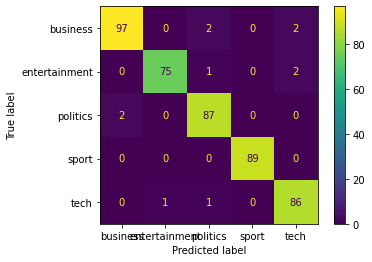

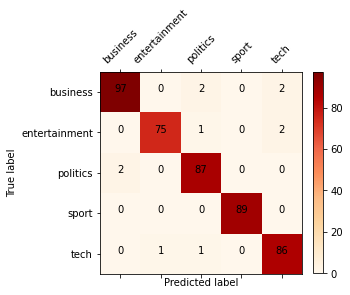

In [51]:
# b) Confusion matrix

import itertools

y_pred = mb.predict(X_test)
confusion_m = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_m, display_labels=files.target_names)
disp.plot()

plt.matshow(confusion_m, cmap=plt.cm.OrRd)
plt.colorbar(fraction=0.045)
tick_marks = np.arange(len(confusion_m))
plt.xticks(tick_marks, files.target_names, rotation=45)
plt.yticks(tick_marks, files.target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i, j in itertools.product(range(confusion_m.shape[0]), range(confusion_m.shape[1])):
        plt.text(j, i, "{:,}".format(confusion_m[i][j]), horizontalalignment="center")

In [55]:
# c) precision, recall, and F1-measure for each class

print(classification_report(y_test, y_pred, target_names=files.target_names))

               precision    recall  f1-score   support

     business       0.98      0.96      0.97       101
entertainment       0.99      0.96      0.97        78
     politics       0.96      0.98      0.97        89
        sport       1.00      1.00      1.00        89
         tech       0.96      0.98      0.97        88

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445

